<a href="https://colab.research.google.com/github/Pomoirab/ML/blob/main/Copy_of_Copy_of_GRP_31_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing/installing the necessary packages

In [ ]:
import pandas as pd

# Mounting on Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Getting the data from Google Drive

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Data/BankChurnersDataSet.csv"
df=pd.read_csv(path)

In [ ]:
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Calculating summary statistics for categorical data

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Gender:
F    5358
M    4769
Name: Gender, dtype: int64

Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64



# Dropping unnecessary features

In [ ]:
df.drop('Attrition_Flag', axis=1, inplace=True)
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Gender                                                                                                                              10127 non-null  object 
 3   Dependent_count                                                                  

In [ ]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Gender                                                                                                                              10127 non-null  object 
 3   Dependent_count                                                                  

In [ ]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Missing Data: Fill missing values with the mean for numerical columns

In [ ]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
    
print(df.describe(),'\n')

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

# Missing Data: Fill missing values with the mode for categorical columns

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Calculating summary statistics for categorical data

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Gender:
F    5358
M    4769
Name: Gender, dtype: int64

Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64



# Displaying a box plot for Customer Age

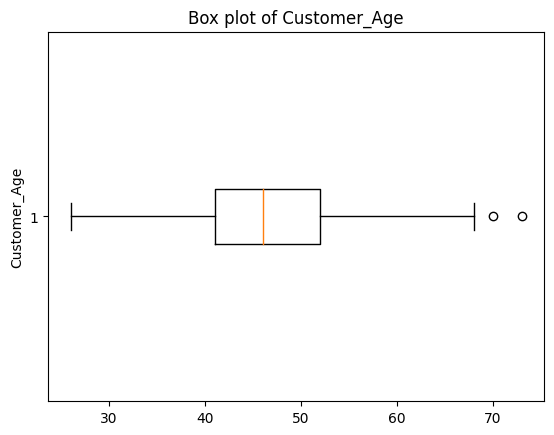

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64 



In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Customer_Age'],vert=False)
plt.title('Box plot of Customer_Age')
plt.ylabel('Customer_Age')
plt.show()
print(df.Customer_Age.describe(),'\n')

** Removing Outliers: To remove outliers, use a method like Z-score or IQR to detect and remove the extreme values. **

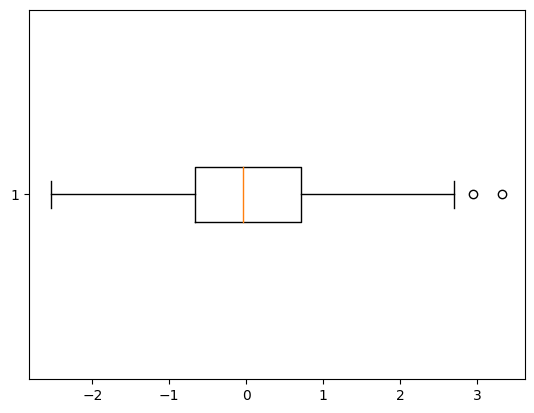

In [ ]:
from scipy import stats

# Calculate Z-score for customer_age column
z_scores = stats.zscore(df['Customer_Age'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]

# Displaying the box plot again

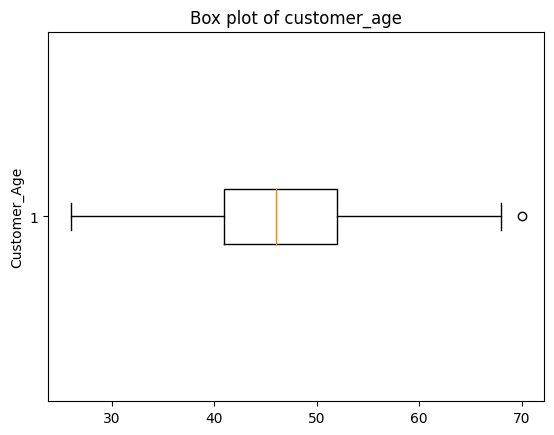

count    10126.000000
mean        46.323326
std          8.012826
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         70.000000
Name: Customer_Age, dtype: float64 



In [ ]:
plt.boxplot(df['Customer_Age'],vert=False)
plt.title('Box plot of customer_age')
plt.ylabel('Customer_Age')
plt.show()
print(df.Customer_Age.describe(),'\n')

In [ ]:
print(df.describe(),'\n')

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012600e+04  10126.000000     10126.000000    10126.000000   
mean   7.391799e+08     46.323326         2.346435       35.928402   
std    3.690488e+07      8.012826         1.298763        7.986811   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130365e+08     41.000000         1.000000       31.000000   
50%    7.179273e+08     46.000000         2.000000       36.000000   
75%    7.731450e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     70.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10126.000000            10126.000000   
mean                   3.812463                2.341102   
std                    1.554440                1.010651   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

# Converting the categorical variables to dummy variables

In [ ]:
df = pd.get_dummies(df, drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10126 non-null  int64  
 1   Customer_Age                    10126 non-null  int64  
 2   Dependent_count                 10126 non-null  int64  
 3   Months_on_book                  10126 non-null  int64  
 4   Total_Relationship_Count        10126 non-null  int64  
 5   Months_Inactive_12_mon          10126 non-null  int64  
 6   Contacts_Count_12_mon           10126 non-null  int64  
 7   Credit_Limit                    10126 non-null  float64
 8   Total_Revolving_Bal             10126 non-null  int64  
 9   Avg_Open_To_Buy                 10126 non-null  float64
 10  Total_Amt_Chng_Q4_Q1            10126 non-null  float64
 11  Total_Trans_Amt                 10126 non-null  int64  
 12  Total_Trans_Ct                  

In [ ]:
print(df.columns)

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum'

# Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
  
# Separate the dummy variables from the numerical variables
dummy_cols = df.select_dtypes(include='uint8').columns
num_cols = list(set(df.select_dtypes(include=['float64', 'int64']).columns) - set(dummy_cols))

# Standardize the numerical variables
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Combine the standardized numerical variables with the dummy variables
df_std = pd.concat([df[num_cols], df[dummy_cols]], axis=1)

print(df_std.head(5),'\n')
print(df_std.describe(),'\n')
     

   Contacts_Count_12_mon  Credit_Limit  Months_Inactive_12_mon  \
0               0.492343      0.446559               -1.327034   
1              -0.411640     -0.041410               -1.327034   
2              -2.219605     -0.573721               -1.327034   
3              -1.315622     -0.585273                1.641496   
4              -2.219605     -0.430906               -1.327034   

   Total_Revolving_Bal  Total_Trans_Ct  Months_on_book  Avg_Open_To_Buy  \
0            -0.473403       -0.974060        0.384603         0.488907   
1            -0.366653       -1.357519        1.010666        -0.008530   
2            -1.426793       -1.911404        0.008965        -0.445686   
3             1.661599       -1.911404       -0.241460        -0.734116   
4            -1.426793       -1.570552       -1.869224        -0.302901   

   Total_Ct_Chng_Q4_Q1  Customer_Age  CLIENTNUM  ...  Income_Category_$120K +  \
0             3.836913     -0.165159   0.802792  ...                   

# Split the data into training and test sets (80:20)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_std.drop('Credit_Limit', axis=1), df['Credit_Limit'], test_size=0.2, random_state = 42)

# Import/install the necessary packages

In [ ]:
!pip install scikeras
import scikeras as sk
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Model architecture and creation

In [ ]:
# define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# create the model
model = KerasRegressor(build_fn=create_model, verbose=0)
print(model)

KerasRegressor(
	model=None
	build_fn=<function create_model at 0x7fe136828d30>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)


# To Find the best parameters using grid search

In [ ]:
# define the grid search parameters
param_grid = {'batch_size': [32, 64],
              'epochs': [50, 100],
              'optimizer': ['adam', 'sgd']}

# perform grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
 
# print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Best Parameters: {'batch_size': 32, 'epochs': 100, 'optimizer': 'sgd'}


# To Fit the model with the best hyperparameters and make predictions using the test set

In [ ]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=0, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Y predict on X test set
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


# Computing Performance Metrics

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.183488874944598e-05
R-squared: 0.9999375503158516


# To Display Feature Importance

Card_Category_Blue: 2.837461471557617
Card_Category_Gold: 2.3344016075134277
Total_Revolving_Bal: 1.8166062831878662
Education_Level_Graduate: 1.6869975328445435
Total_Amt_Chng_Q4_Q1: 1.5876929759979248
Income_Category_Less than $40K: 1.3711402416229248
Customer_Age: 0.8144843578338623
Dependent_count: 0.7877635955810547
Income_Category_Unknown: 0.782707154750824
Education_Level_Post-Graduate: 0.7561928629875183
Card_Category_Silver: 0.7472612261772156
Months_on_book: 0.7449765205383301
Avg_Open_To_Buy: 0.7264518737792969
Education_Level_Uneducated: 0.6934188008308411
Months_Inactive_12_mon: 0.6828525066375732
Marital_Status_Married: 0.6817195415496826
Education_Level_Unknown: 0.6619426012039185
Total_Ct_Chng_Q4_Q1: 0.6471303701400757
Income_Category_$120K +: 0.6424476504325867
Marital_Status_Single: 0.5944770574569702
Education_Level_College: 0.548321008682251
Contacts_Count_12_mon: 0.5418246388435364
Marital_Status_Unknown: 0.5121386647224426
Card_Category_Platinum: 0.500823915004730

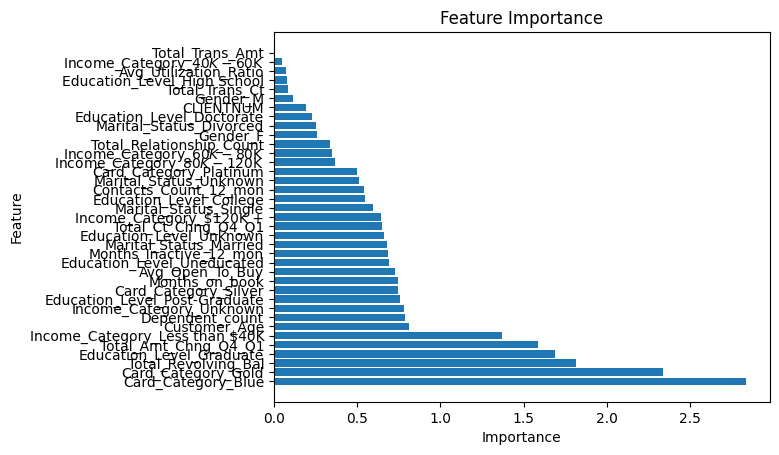

In [ ]:
import numpy as np

importance = best_model.predict(X_train, verbose=0)
importance = np.squeeze(importance)
feature_names = X_train.columns
feature_importance = dict(zip(feature_names, importance))
sorted_importance = sorted(feature_importance.items(), key=lambda kv: abs(kv[1]), reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {abs(importance)}")

importance_values = [abs(kv[1]) for kv in sorted_importance]
#print(importance_values)
feature_names = [kv[0] for kv in sorted_importance]
#print(feature_names)

plt.barh(range(len(importance_values)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# We Use the following hyperparameter snippet for the tuning:

In [ ]:
param_grid = {'batch_size': [32, 64, 128],
              'epochs': [50, 100, 150],
              'optimizer': ['adam', 'sgd', 'Adamax']}